# Trabajo IA

## Selección de características para mejorar modelos predictivos

En este cuadernillo se realiza el tratamiento de datos del csv TITANIC, así como la implementación y comparación de varios algoritmos de búsqueda y entrenamiento.

### Tratamiento de datos

Se aplicaron los siguientes procesos de preprocesamiento de datos:

    •Normalización de variables predictoras: Se normalizaron las variables Age y Fare utilizando el escalador MinMaxScaler para asegurar que todas las características estén en la misma escala.

    •Codificación numérica de atributos discretos: Los atributos Sex, Embarked, Alone y Deck, que originalmente se presentaban como cadenas de texto, fueron codificados numéricamente utilizando las técnicas de OrdinalEncoder o LabelEncoder, según corresponda.

### Primer experimento para evaluar la capacidad predictiva del conjunto de variables completo

    Para evaluar la calidad de las soluciones que se obtienen con los algoritmos de búsqueda de variables, se realizó un primer experimento en el que se entrenó un modelo de clasificación utilizando todas las variables predictoras disponibles. Se utilizó un árbol de decisión de clasificación.

### Algoritmos de búsqueda implementados

    •Búsqueda secuencial hacia atrás (backward_sequential_search): Este algoritmo busca encontrar el mejor subconjunto de variables predictoras eliminando iterativamente la variable que más afecta el rendimiento del modelo.

    •Búsqueda secuencial hacia atrás mixta (backward_sequential_search_mixto): Similar al anterior, pero también considera añadir variables si se mejora el rendimiento del modelo.

### Algoritmos de entrenamiento

    •Árboles de decisión de clasificación (DecisionTreeClassifier): Un algoritmo de aprendizaje supervisado utilizado para clasificación.




## Tratamiento de datos

In [4]:
import numpy as np
np.random.seed(357823)

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler



model = RandomForestClassifier()

titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

atributos_discretos = ['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Title', 'Sex', 'Is_Married','Pclass', 'Parch', 'Embarked', 
                       'Age_band', 'Family_Size', 'Alone']
atributos_continuos = ['Age', 'Fare']
atributos = titanic.loc[:, atributos_discretos + atributos_continuos]

objetivo = titanic['Survived']
objetivo.head()  # objetivo es una Series unidimensional


codificador_atributos_discretos = OrdinalEncoder()
codificador_atributos_discretos.fit(atributos[atributos_discretos])

print('Número de atributos detectados discretos:',
      f'{codificador_atributos_discretos.n_features_in_}')
print()
print('Nombres de los atributos detectados discretos:')
print(f'{codificador_atributos_discretos.feature_names_in_}')
print()
print('Categorías detectadas de cada atributo:')
for atributo, categorías in zip(
    codificador_atributos_discretos.feature_names_in_,
    codificador_atributos_discretos.categories_):
    print(f'{atributo}: {categorías}')

atributos[atributos_discretos] = codificador_atributos_discretos.transform(atributos[atributos_discretos])
atributos.head()


# El método fit_transform ajusta el codificador a los datos y, a continuación, codifica estos adecuadamente. 

normalizador = MinMaxScaler(
    # Cada atributo se normaliza al intervalo [0, 1]
    feature_range=(0, 1)
)

# Como nos interesa conservar los atributos originales, realizamos la
# normalización sobre una copia del DataFrame de atributos
atributos_normalizados = atributos.copy()
atributos_normalizados[:] = normalizador.fit_transform(atributos_normalizados)
atributos_normalizados.head()

titanic = atributos_normalizados.copy()
titanic['Survived'] = objetivo
titanic.head()


Número de atributos detectados discretos: 13

Nombres de los atributos detectados discretos:
['Initial' 'SibSp' 'Deck' 'Fare_cat' 'Title' 'Sex' 'Is_Married' 'Pclass'
 'Parch' 'Embarked' 'Age_band' 'Family_Size' 'Alone']

Categorías detectadas de cada atributo:
Initial: [0 1 2 3 4]
SibSp: [0 1 2 3 4 5 8]
Deck: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'U']
Fare_cat: [0 1 2 3]
Title: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Sex: ['female' 'male']
Is_Married: [0 1]
Pclass: [1 2 3]
Parch: [0 1 2 3 4 5 6]
Embarked: ['C' 'Q' 'S']
Age_band: [0 1 2 3 4]
Family_Size: [ 0  1  2  3  4  5  6  7 10]
Alone: ['No' 'Yes']


,Initial,SibSp,Deck,Fare_cat,Title,Sex,Is_Married,Pclass,Parch,Embarked,Age_band,Family_Size,Alone,Age,Fare,Survived
0,0.00,0.166667,1.00,0.000000,0.6875,1.0,0.0,1.0,0.0,1.0,0.25,0.125,0.0,0.271174,0.014151,0
1,0.25,0.166667,0.25,1.000000,0.7500,0.0,1.0,0.0,0.0,0.0,0.50,0.125,0.0,0.472229,0.139136,1
2,0.50,0.000000,1.00,0.333333,0.5000,0.0,0.0,1.0,0.0,1.0,0.25,0.000,1.0,0.321438,0.015469,1
3,0.25,0.166667,0.25,1.000000,0.7500,0.0,1.0,0.0,0.0,1.0,0.50,0.125,0.0,0.434531,0.103644,1
4,0.00,0.000000,1.00,0.333333,0.6875,1.0,0.0,1.0,0.0,1.0,0.50,0.000,1.0,0.434531,0.015713,0


### Evaluación del modelo


### Árbol de decisión de clasificación(DecisionTreeClassifier)

Clases detectadas: [0 1]


array([[520,  29],
       [ 99, 243]], dtype=int64)

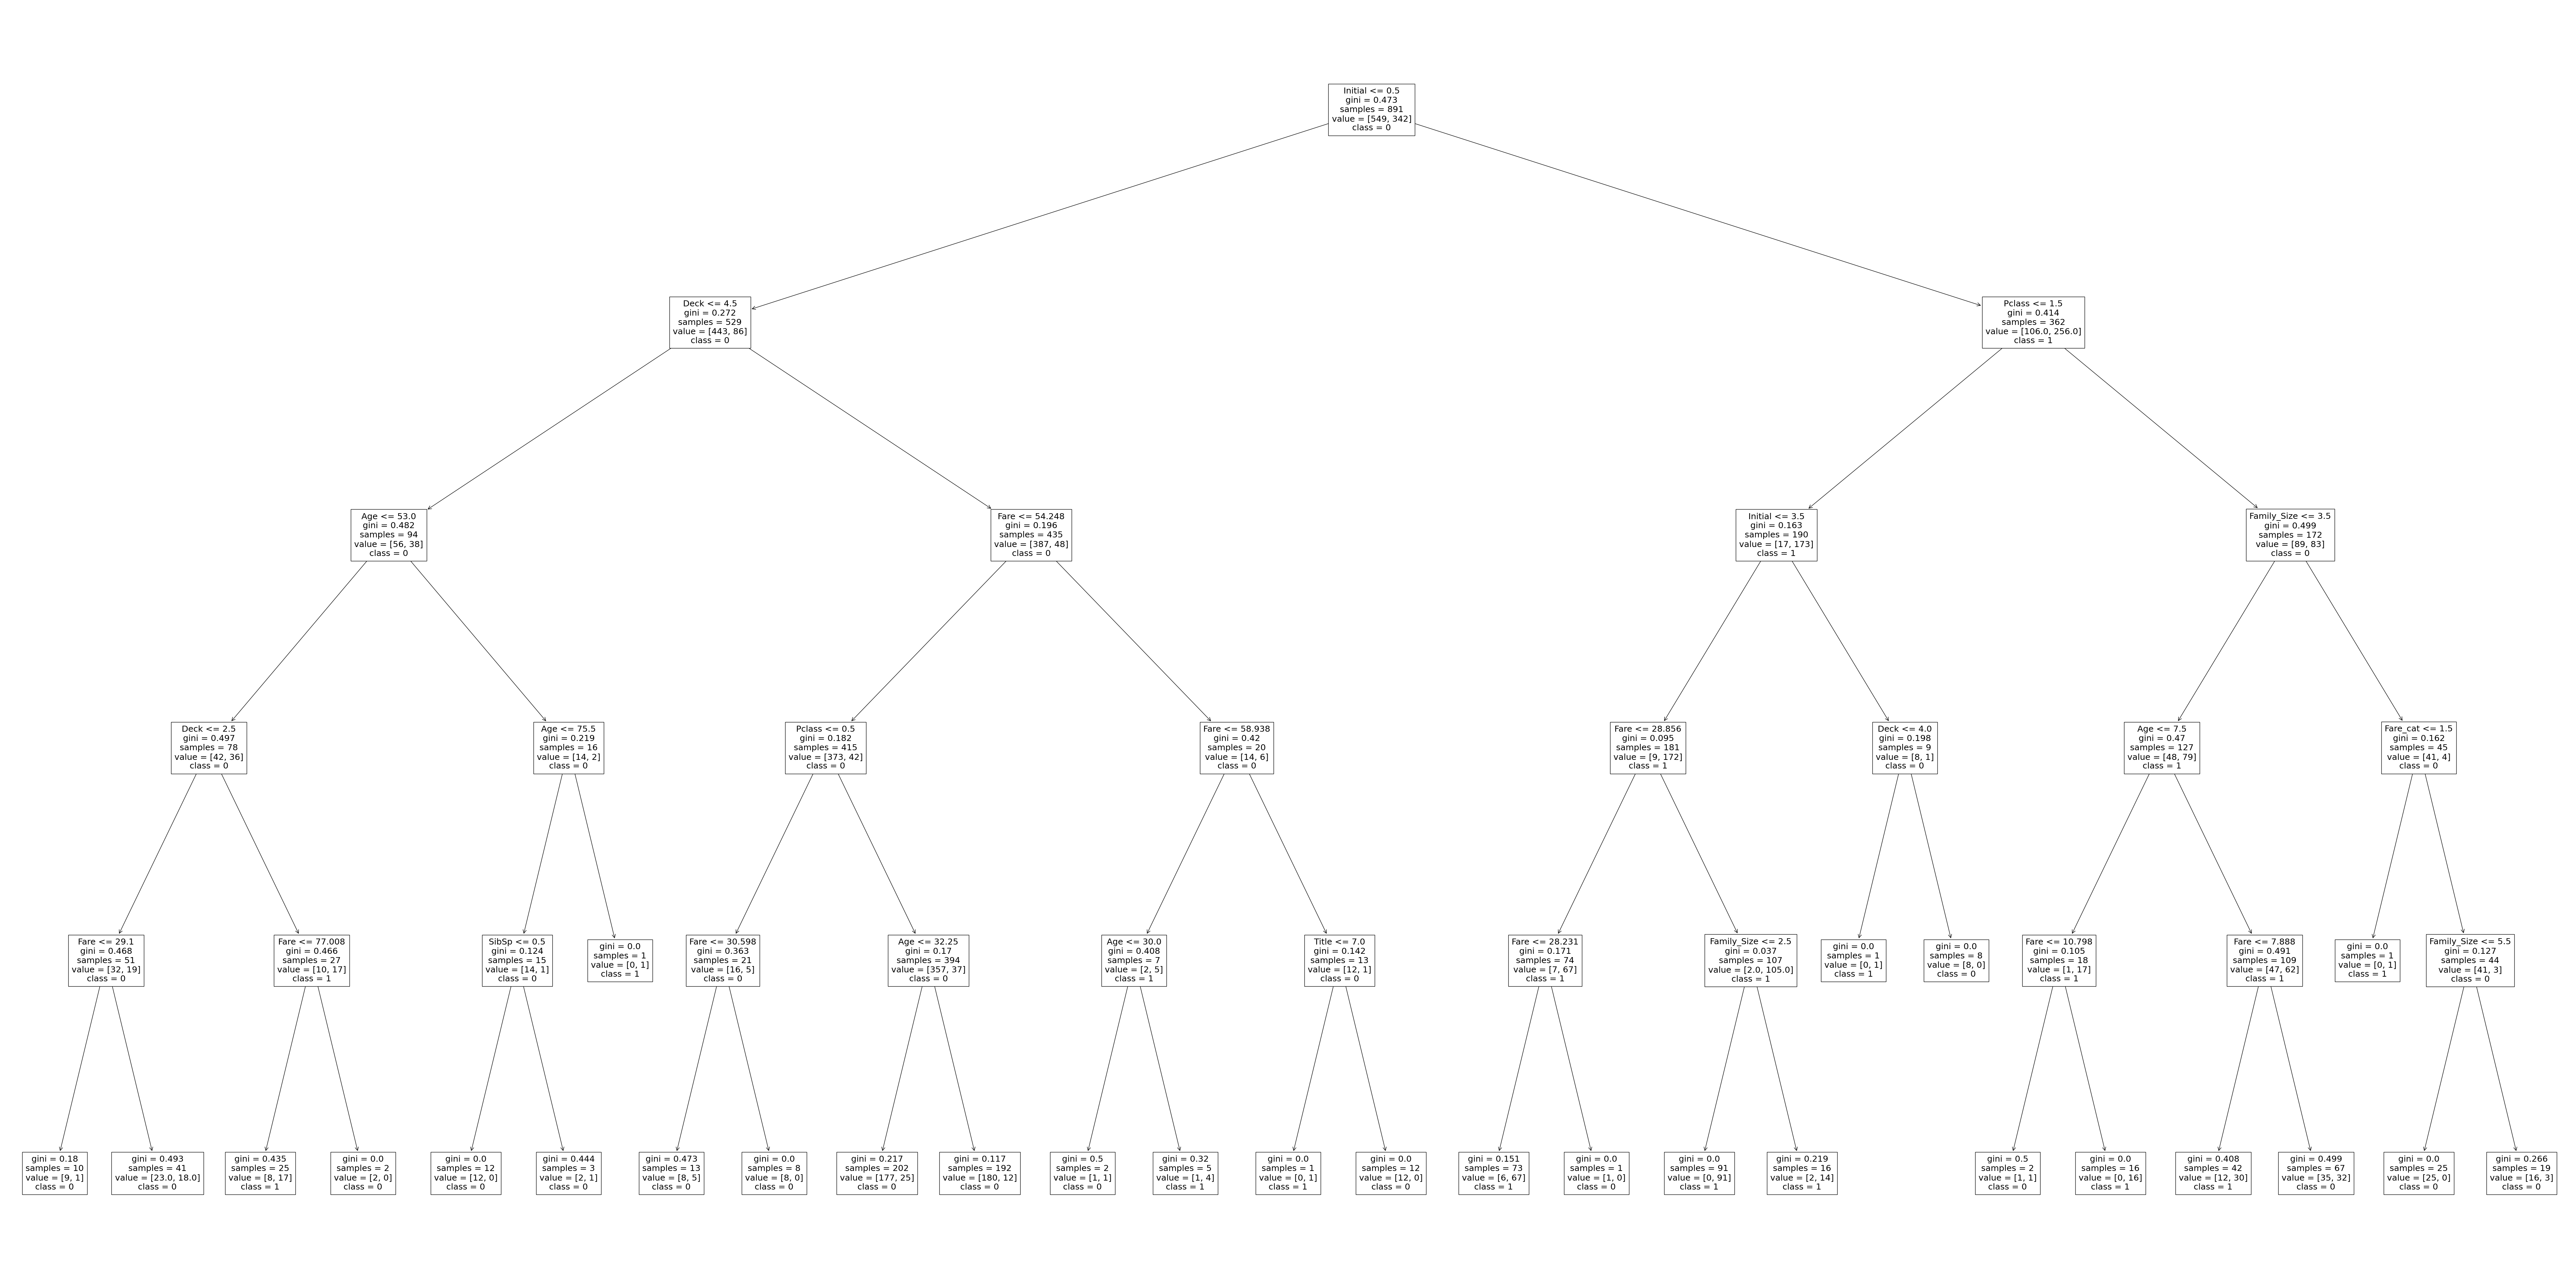

In [6]:
from matplotlib import pyplot
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


codificador_objetivo = LabelEncoder()
objetivo = codificador_objetivo.fit_transform(objetivo)
print(f'Clases detectadas: {codificador_objetivo.classes_}')

clasificador_CART = DecisionTreeClassifier(
    max_depth=5
)
clasificador_CART.fit(atributos, objetivo)


pyplot.figure(figsize=(100, 50))  # Anchura y altura del gráfico
árbol = plot_tree(clasificador_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos + atributos_continuos,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['0', '1'])

# Predicciones

predicciones = clasificador_CART.predict(atributos)
predicciones

clasificador_CART.score(atributos, objetivo)

pd.Series(objetivo).value_counts()

pd.Series(predicciones).value_counts()
conf_matrix = confusion_matrix(objetivo, predicciones)
conf_matrix

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo)

clasificador_CART = DecisionTreeClassifier(
    max_depth=4,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)

resultados_validación_cruzada = cross_validate(clasificador_CART,
                                               atributos_entrenamiento,
                                               objetivo_entrenamiento,
                                               scoring='recall',
                                               cv=10)
#resultados_validación_cruzada
resultados_validación_cruzada['test_score'].mean()

0.7652116402116402

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Supongamos que atributos es un DataFrame con las características y objetivo es una Serie con la variable objetivo
# Ajustar el modelo
clasificador_CART = DecisionTreeClassifier(max_depth=8)
clasificador_CART.fit(atributos, objetivo)

# Calcular la precisión del modelo
score = clasificador_CART.score(atributos, objetivo)

# Obtener las predicciones
predicciones = clasificador_CART.predict(atributos)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: \n{atributos.columns}')
print()
print(f'Precisión: {score}')
print()
print(f'Valores: {values}')
print()
print(f'Matriz de confusión: \n{m_confusion}')



Variabes predictoras: 
Index(['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Title', 'Sex', 'Is_Married',
       'Pclass', 'Parch', 'Embarked', 'Age_band', 'Family_Size', 'Alone',
       'Age', 'Fare'],
      dtype='object')

Precisión: 0.9158249158249159

Valores: 0    549
1    342
Name: count, dtype: int64

Matriz de confusión: 
[[529  20]
 [ 55 287]]


### Modelo Naive Bayes

In [9]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado

solucion = titanic.loc[:, atributos.columns]
clasificador_NB.fit(solucion, objetivo)

# Calcular la precisión del modelo
score = clasificador_NB.score(solucion, objetivo)

# Obtener las predicciones
predicciones = clasificador_NB.predict(solucion)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: {atributos}')
print(f'Precisión: {score}')
print(f'Valores: {values}')
print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras:      Initial  SibSp  Deck  Fare_cat  Title  Sex  Is_Married  Pclass  Parch  \
0        0.0    1.0   8.0       0.0   11.0  1.0         0.0     2.0    0.0   
1        1.0    1.0   2.0       3.0   12.0  0.0         1.0     0.0    0.0   
2        2.0    0.0   8.0       1.0    8.0  0.0         0.0     2.0    0.0   
3        1.0    1.0   2.0       3.0   12.0  0.0         1.0     0.0    0.0   
4        0.0    0.0   8.0       1.0   11.0  1.0         0.0     2.0    0.0   
..       ...    ...   ...       ...    ...  ...         ...     ...    ...   
886      4.0    0.0   8.0       1.0   14.0  1.0         0.0     1.0    0.0   
887      2.0    0.0   1.0       2.0    8.0  0.0         0.0     0.0    0.0   
888      2.0    1.0   8.0       2.0    8.0  0.0         0.0     2.0    2.0   
889      0.0    0.0   2.0       2.0   11.0  1.0         0.0     0.0    0.0   
890      0.0    0.0   8.0       0.0   11.0  1.0         0.0     2.0    0.0   

     Embarked  Age_band  Family_Size  Alo

## Algoritmo de búsqueda hacia atrás

In [17]:
#Esto parametros nos permite tener el minimo num de variables de predictoras y un mayor score
import funciones.BusquedaSecuencialAtras as bsa
bsatras = bsa.backward_sequential_search(titanic, 'Survived', model, 16, 10)
bsatras


,variables,size,score
2,"[Initial, Pclass, Fare]",3,0.819838
3,"[Initial, Pclass, Embarked, Fare]",4,0.819273
4,"[Initial, SibSp, Pclass, Embarked, Fare]",5,0.815692
5,"[Initial, SibSp, Pclass, Embarked, Alone, Fare]",6,0.814276
8,"[Initial, SibSp, Deck, Is_Married, Pclass, Emb...",9,0.809484
10,"[Initial, SibSp, Deck, Is_Married, Pclass, Par...",11,0.809312
7,"[Initial, SibSp, Deck, Pclass, Embarked, Alone...",8,0.808951
9,"[Initial, SibSp, Deck, Is_Married, Pclass, Emb...",10,0.808856
1,"[Initial, Fare]",2,0.808618
11,"[Initial, SibSp, Deck, Fare_cat, Is_Married, P...",12,0.807517


### Árbol de decisión de clasificación(DecisionTreeClassifier)



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

for k in range(0, len(bsatras)-1, 1):
    selected_variables = bsatras.iloc[k]['variables']  # Obtiener las variables de la mejor iteración
    solucion = titanic.loc[:, selected_variables]
    # Realizar la búsqueda secuencial hacia atrás
    model = DecisionTreeClassifier(max_depth=8)

    # Dividir los datos
    X = titanic[selected_variables]
    objetivo= titanic['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, objetivo, test_size=.2,stratify=objetivo)

    # Entrenar el modelo
    clasificador_CART = DecisionTreeClassifier(
        max_depth=10,  # Máxima profundidad del árbol
        min_samples_split=5  # Mínimo número de ejemplos para poder particionar
    )

    resultados_validación_cruzada = cross_validate(clasificador_CART,
                                                X_train,
                                                y_train,
                                                scoring='recall',
                                                cv=10)

    # Ajustar el modelo
    clasificador_CART = DecisionTreeClassifier(max_depth=8)
    clasificador_CART.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_CART.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_CART.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: \n{selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')
    print()

NameError: name 'bsatras' is not defined

### Modelo Naive Bayes

In [12]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado

for k in range(0, len(bsatras)-1, 1):

    selected_variables = bsatras.iloc[k]['variables']  # Obtiener las variables de la mejor iteración
    solucion = titanic.loc[:, selected_variables]
    clasificador_NB.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_NB.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_NB.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: {selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras: ['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Sex', 'Is_Married', 'Pclass', 'Age_band']
Precisión: 0.7676767676767676
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[475  74]
 [133 209]]
Variabes predictoras: ['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Sex', 'Pclass', 'Age_band']
Precisión: 0.7654320987654321
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[473  76]
 [133 209]]
Variabes predictoras: ['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Sex', 'Is_Married', 'Pclass', 'Age_band', 'Alone']
Precisión: 0.7654320987654321
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[471  78]
 [131 211]]
Variabes predictoras: ['Initial', 'SibSp', 'Deck', 'Fare_cat', 'Pclass', 'Age_band']
Precisión: 0.6992143658810326
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[471  78]
 [190 152]]
Variabes predictoras: ['Initial', 'SibSp', 'Deck', 'Fa

## Algoritmo de búsqueda hacia atrás mixta

In [13]:
import funciones.BusquedaSecuencialAtrasMixta as bsam
busq_atras_mixta = bsam.backward_sequential_mixed_search(titanic, 'Survived', model, 10, 6, 10)
busq_atras_mixta

,variables,size,score
13,"[Fare, Title, Sex, Is_Married, Embarked, Pclas...",9,0.821582
14,"[Title, Sex, Is_Married, Embarked, Pclass, Dec...",9,0.821531
9,"[SibSp, Deck, Pclass, Family_Size, Fare, Title...",9,0.817382
7,"[SibSp, Deck, Fare_cat, Pclass, Embarked, Fami...",10,0.817108
11,"[SibSp, Family_Size, Fare, Title, Sex, Is_Marr...",9,0.817058
15,"[Title, Sex, Is_Married, Embarked, Pclass, Dec...",10,0.816841
8,"[SibSp, Deck, Fare_cat, Pclass, Family_Size, F...",9,0.815850
12,"[Family_Size, Fare, Title, Sex, Is_Married, Em...",9,0.815364
2,"[Initial, SibSp, Deck, Fare_cat, Sex, Is_Marri...",13,0.814852
4,"[Initial, SibSp, Deck, Fare_cat, Is_Married, P...",12,0.814668


### Árbol de decisión de clasificación(DecisionTreeClassifier)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

for k in range(0, len(busq_atras_mixta)-1, 1):
    selected_variables = busq_atras_mixta.iloc[k]['variables']  # Obtiener las variables de la mejor iteración
    solucion = titanic.loc[:, selected_variables]
    # Realizar la búsqueda secuencial hacia atrás
    model = DecisionTreeClassifier(max_depth=8)

    # Dividir los datos
    X = titanic[selected_variables]
    objetivo= titanic['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, objetivo, test_size=.2,stratify=objetivo)

    # Entrenar el modelo
    clasificador_CART = DecisionTreeClassifier(
        max_depth=10,  # Máxima profundidad del árbol
        min_samples_split=5  # Mínimo número de ejemplos para poder particionar
    )

    resultados_validación_cruzada = cross_validate(clasificador_CART,
                                                X_train,
                                                y_train,
                                                scoring='recall',
                                                cv=10)

    # Ajustar el modelo
    clasificador_CART = DecisionTreeClassifier(max_depth=8)
    clasificador_CART.fit(solucion, objetivo)

    # Calcular la precisión del modelo
    score = clasificador_CART.score(solucion, objetivo)

    # Obtener las predicciones
    predicciones = clasificador_CART.predict(solucion)

    # Contar los valores de la variable objetivo
    values = pd.Series(objetivo).value_counts()

    # Calcular la matriz de confusión
    m_confusion = confusion_matrix(objetivo, predicciones)

    # Imprimir los resultados
    print(f'Variabes predictoras: \n{selected_variables}')
    print(f'Precisión: {score}')
    print(f'Valores: {values}')
    print(f'Matriz de confusión: \n{m_confusion}')
    print()  

Variabes predictoras: 
['Fare', 'Title', 'Sex', 'Is_Married', 'Embarked', 'Pclass', 'Deck', 'Fare_cat', 'Initial']
Precisión: 0.9001122334455668
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[515  34]
 [ 55 287]]

Variabes predictoras: 
['Title', 'Sex', 'Is_Married', 'Embarked', 'Pclass', 'Deck', 'Fare_cat', 'Initial', 'Fare']
Precisión: 0.9001122334455668
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[515  34]
 [ 55 287]]

Variabes predictoras: 
['SibSp', 'Deck', 'Pclass', 'Family_Size', 'Fare', 'Title', 'Sex', 'Is_Married', 'Embarked']
Precisión: 0.8933782267115601
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[509  40]
 [ 55 287]]

Variabes predictoras: 
['SibSp', 'Deck', 'Fare_cat', 'Pclass', 'Embarked', 'Family_Size', 'Fare', 'Title', 'Sex', 'Is_Married']
Precisión: 0.8922558922558923
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión:

### Modelo Naive Bayes

In [15]:
from sklearn.naive_bayes import CategoricalNB
clasificador_NB = CategoricalNB(alpha=1)  # alpha es el parámetro de suavizado
clasificador_NB.fit(solucion, objetivo)

CategoricalNB(alpha=1)

In [16]:
# Calcular la precisión del modelo
score = clasificador_NB.score(solucion, objetivo)

# Obtener las predicciones
predicciones = clasificador_NB.predict(solucion)

# Contar los valores de la variable objetivo
values = pd.Series(objetivo).value_counts()

# Calcular la matriz de confusión
m_confusion = confusion_matrix(objetivo, predicciones)

# Imprimir los resultados
print(f'Variabes predictoras: {selected_variables}')
print(f'Precisión: {score}')
print(f'Valores: {values}')
print(f'Matriz de confusión: \n{m_confusion}')

Variabes predictoras: ['Title', 'Sex', 'Is_Married', 'Embarked', 'Pclass', 'Deck', 'Fare_cat', 'Initial', 'Fare', 'Alone', 'Family_Size', 'SibSp', 'Parch', 'Age_band']
Precisión: 0.7699214365881033
Valores: Survived
0    549
1    342
Name: count, dtype: int64
Matriz de confusión: 
[[463  86]
 [119 223]]
